In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Correct Paths (Use raw strings)
train_data = r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\data\train"
val_data   = r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\data\val"
test_data  = r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\data\test"

# ImageDataGenerator for normalization
datagen = ImageDataGenerator(rescale=1.0/255)

# Load Train
train_generator = datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Validation
val_generator = datagen.flow_from_directory(
    val_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Test
test_generator = datagen.flow_from_directory(
    test_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # important for prediction
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [ ]:
# Read dataset
val_data = "D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\data\val"
train_data = "D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\data\train"
test_data = "D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\data\test"

In [ ]:
!pip install tensorflow

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resize for validation
val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale
val_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Resize for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Apply augumentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=40,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True  # Flip images
)
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),  # Resize all images
    batch_size=32,
    class_mode='categorical'
)

Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Found 6225 images belonging to 11 classes.


In [13]:
print(train_generator.class_indices)


{'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


c:\Users\dilip\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
import pickle

# Define save path
save_path = r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F"


# Load the pre-trained VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional layers

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dense(train_generator.num_classes, activation="softmax")(x)  # Use number of classes from augmented data

model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model using augmented dataset
history = model.fit(train_generator, validation_data=val_generator, epochs=3)

# Save the trained model
model.save(f"{save_path}/vgg16_trained_model.h5")
print(f"Model saved successfully at {save_path}/vgg16_trained_model.h5")

# Save training history
with open(f"{save_path}/training_history_vgg16.pkl", "wb") as f:
    pickle.dump(history.history, f)
print(f"Training history saved successfully at {save_path}/training_history_vgg16.pkl")

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 737s 4s/step - accuracy: 0.8392 - loss: 0.6924 - val_accuracy: 0.9414 - val_loss: 0.1952
Epoch 2/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 755s 4s/step - accuracy: 0.9913 - loss: 0.0553 - val_accuracy: 0.9771 - val_loss: 0.0938
Epoch 3/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 728s 4s/step - accuracy: 0.9995 - loss: 0.0145 - val_accuracy: 0.9799 - val_loss: 0.0602


Model saved successfully at D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F/vgg16_trained_model.h5
Training history saved successfully at D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F/training_history_vgg16.pkl
100/100 ━━━━━━━━━━━━━━━━━━━━ 301s 3s/step - accuracy: 0.9934 - loss: 0.0370
Test accuracy: 0.9934


In [ ]:
""" Reload the saved model if required
loaded_model = load_model("vgg16_trained_model.h5")
print("Model loaded successfully!")

# Evaluate the reloaded model (Optional)
test_loss, test_acc = loaded_model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")"""

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
import pickle

# Define save path
save_path = "D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F"

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional layers

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=3)

# Save model
model.save(f"{save_path}/resnet50_trained_model.h5")
print(f"Model saved successfully at {save_path}/resnet50_trained_model.h5")

# Save training history
with open(f"{save_path}/training_history_resnet50.pkl", "wb") as f:
    pickle.dump(history.history, f)
print(f"Training history saved successfully at {save_path}/training_history_resnet50.pkl")

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 0.2108 - loss: 3.5497 - val_accuracy: 0.1648 - val_loss: 2.3166
Epoch 2/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.2580 - loss: 2.0958 - val_accuracy: 0.2848 - val_loss: 2.0053
Epoch 3/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.2985 - loss: 1.9465 - val_accuracy: 0.2830 - val_loss: 1.9749


Model saved successfully at D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F/resnet50_trained_model.h5
Training history saved successfully at D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F/training_history_resnet50.pkl
100/100 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.2764 - loss: 1.9755
Test accuracy: 0.2764


In [6]:
import tensorflow as tf
import pickle

# Define save path
save_path = "D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F"

# Load the trained model
model = tf.keras.models.load_model(f"{save_path}/resnet50_trained_model.h5")
print("Model loaded successfully!")

# Load training history
with open(f"{save_path}/training_history_resnet50.pkl", "rb") as f:
    history = pickle.load(f)
print("Training history loaded successfully!")

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


Model loaded successfully!
Training history loaded successfully!
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.2764 - loss: 1.9755
Test accuracy: 0.2764


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
import pickle

# Define save path
save_path = "D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F"

# Load the pre-trained MobileNet model
base_model = MobileNet(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional layers

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=3)

# Save model
model.save(f"{save_path}/mobilenet_trained_model.h5")
print(f"Model saved successfully at {save_path}/mobilenet_trained_model.h5")

# Save training history
with open(f"{save_path}/training_history_mobilenet.pkl", "wb") as f:
    pickle.dump(history.history, f)
print(f"Training history saved successfully at {save_path}/training_history_mobilenet.pkl")

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 676ms/step - accuracy: 0.8998 - loss: 1.7817 - val_accuracy: 0.9872 - val_loss: 0.0965
Epoch 2/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 135s 691ms/step - accuracy: 0.9833 - loss: 0.1075 - val_accuracy: 0.9771 - val_loss: 0.1617
Epoch 3/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 133s 683ms/step - accuracy: 0.9936 - loss: 0.0421 - val_accuracy: 0.9734 - val_loss: 0.1495


Model saved successfully at D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F/mobilenet_trained_model.h5
Training history saved successfully at D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F/training_history_mobilenet.pkl
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 486ms/step - accuracy: 0.9859 - loss: 0.1413
Test accuracy: 0.9859


In [8]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
import pickle

# Define save path
save_path = "D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F"

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional layers

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=3)

# Save model
model.save(f"{save_path}/inceptionv3_trained_model.h5")
print(f"Model saved successfully at {save_path}/inceptionv3_trained_model.h5")

# Save training history
with open(f"{save_path}/training_history_inceptionv3.pkl", "wb") as f:
    pickle.dump(history.history, f)
print(f"Training history saved successfully at {save_path}/training_history_inceptionv3.pkl")

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.8599 - loss: 2.7809 - val_accuracy: 0.9441 - val_loss: 0.2218
Epoch 2/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9732 - loss: 0.0979 - val_accuracy: 0.9396 - val_loss: 0.2855
Epoch 3/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9717 - loss: 0.1066 - val_accuracy: 0.9368 - val_loss: 0.2990


Model saved successfully at D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F/inceptionv3_trained_model.h5
Training history saved successfully at D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F/training_history_inceptionv3.pkl
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 773ms/step - accuracy: 0.9532 - loss: 0.1814
Test accuracy: 0.9532


In [9]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
import pickle

# Define save path
save_path = "D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F"

# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional layers

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=3)

# Save model
model.save(f"{save_path}/efficientnetb0_trained_model.h5")
print(f"Model saved successfully at {save_path}/efficientnetb0_trained_model.h5")

# Save training history
with open(f"{save_path}/training_history_efficientnetb0.pkl", "wb") as f:
    pickle.dump(history.history, f)
print(f"Training history saved successfully at {save_path}/training_history_efficientnetb0.pkl")

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 200s 985ms/step - accuracy: 0.1134 - loss: 4.6593 - val_accuracy: 0.1712 - val_loss: 3.3801
Epoch 2/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 189s 971ms/step - accuracy: 0.1269 - loss: 2.8101 - val_accuracy: 0.0897 - val_loss: 3.1160
Epoch 3/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 188s 966ms/step - accuracy: 0.1304 - loss: 2.5543 - val_accuracy: 0.1712 - val_loss: 2.3231


Model saved successfully at D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F/efficientnetb0_trained_model.h5
Training history saved successfully at D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F/training_history_efficientnetb0.pkl
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 709ms/step - accuracy: 0.1632 - loss: 2.3292
Test accuracy: 0.1632


100/100 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.9934 - loss: 0.0370
100/100 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step


100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.2764 - loss: 1.9755
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step


c:\Users\dilip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 489ms/step - accuracy: 0.9859 - loss: 0.1413
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 493ms/step


100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 775ms/step - accuracy: 0.9532 - loss: 0.1814
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 795ms/step


100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 710ms/step - accuracy: 0.1632 - loss: 2.3292
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 734ms/step

Model: VGG16
Accuracy: 0.9934
Precision: 0.9935
Recall: 0.9934
F1-Score: 0.9929
Confusion Matrix:
[[520   0   0   0   0   0   0   0   0   0   0]
 [  8   5   0   0   0   0   0   0   0   0   0]
 [  0   0 297   0   0   0   0   0   0   1   0]
 [  0   0   0 305   0   0   0   0   0   0   0]
 [  0   0   0   0 281   3   0   0   0   2   0]
 [  0   0   0   0   0 288   0   0   0   3   0]
 [  0   0   0   0   0   0 272   0   0   0   1]
 [  0   0   0   0   0   0   0 327   0   0   0]
 [  0   0   0   0   0   0   0   0 289   0   0]
 [  0   0   2   0   0   0   0   0   0 291   0]
 [  0   0   0   0   0   1   0   0   0   0 291]]

Model: ResNet50
Accuracy: 0.2764
Precision: 0.2964
Recall: 0.2764
F1-Score: 0.2144
Confusion Matrix:
[[350   0   1   0   0  87   0   0  80   0   2]
 [ 12   0   0   0   0   0   0   0   1   0   0]
 [ 96   0  46   0   0  22   3   0 109   1  21]
 [ 20   0  44   0 

c:\Users\dilip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


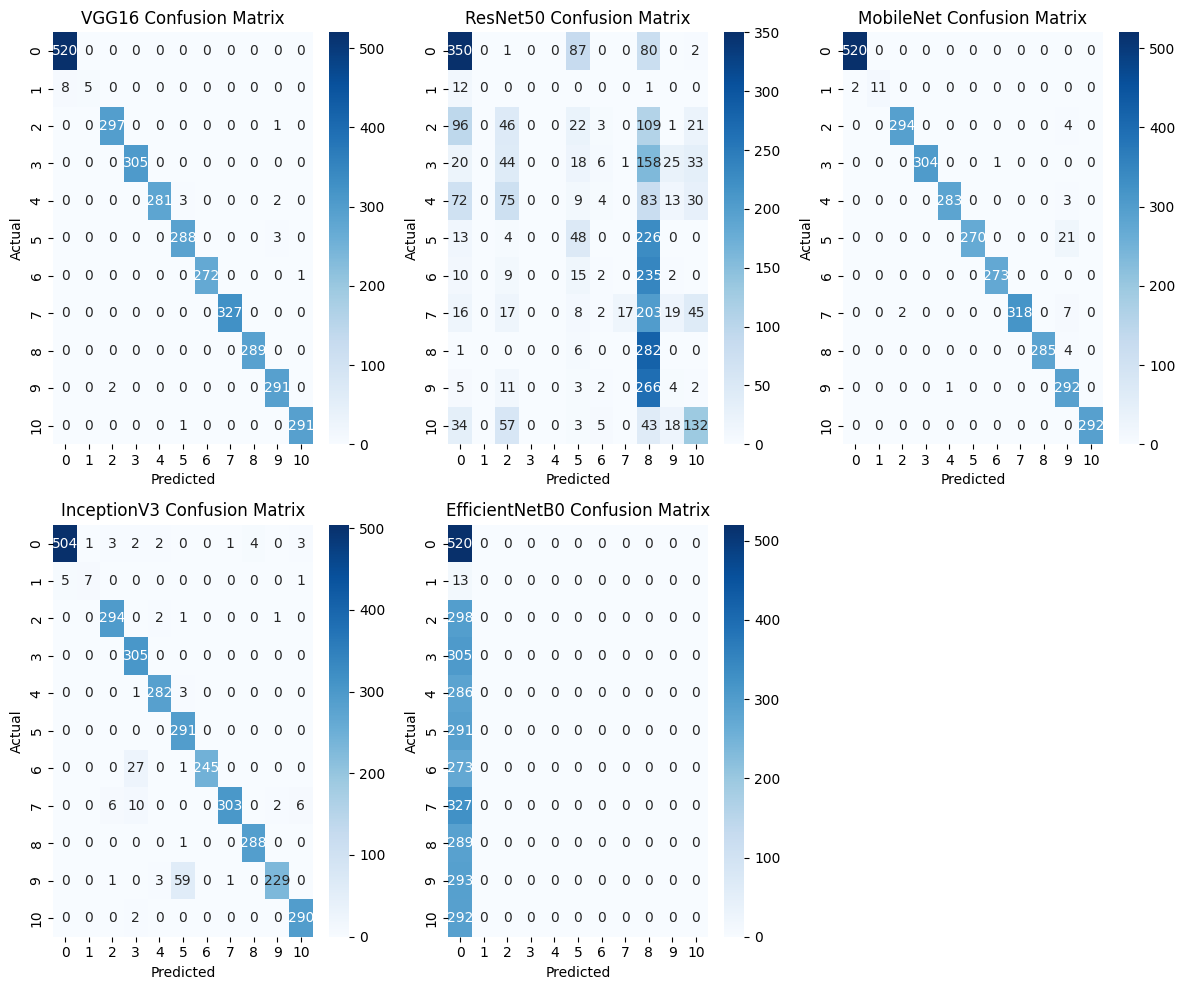

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dictionary of models
models = {
    "VGG16": r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F\vgg16_trained_model.h5",
    "ResNet50": r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F\resnet50_trained_model.h5",
    "MobileNet": r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F\mobilenet_trained_model.h5",
    "InceptionV3": r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F\inceptionv3_trained_model.h5",
    "EfficientNetB0": r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F\efficientnetb0_trained_model.h5"
}


# Store results
metrics = {}

for model_name, model_path in models.items():
    # Load model
    model = tf.keras.models.load_model(model_path)

    # Evaluate model on test data
    loss, acc = model.evaluate(test_generator)

    # Predict on test data
    y_pred_probs = model.predict(test_generator)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = test_generator.classes  # Get true labels from the generator

    # Compute metrics
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    cm = confusion_matrix(y_true, y_pred)

    # Store results
    metrics[model_name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": cm
    }

# Display results
for model, scores in metrics.items():
    print(f"\nModel: {model}")
    for metric, value in scores.items():
        if metric == "Confusion Matrix":
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")

# Plot Confusion Matrices
plt.figure(figsize=(12, 10))
for i, (model, scores) in enumerate(metrics.items()):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(scores["Confusion Matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [11]:
# Identify the best model based on Accuracy
best_model = max(metrics.items(), key=lambda x: x[1]["Accuracy"])

# Print the best model in the next cell
print(f"\nBest Model: {best_model[0]}")
print(f"Accuracy: {best_model[1]['Accuracy']:.4f}")
print(f"Precision: {best_model[1]['Precision']:.4f}")
print(f"Recall: {best_model[1]['Recall']:.4f}")
print(f"F1-Score: {best_model[1]['F1-Score']:.4f}")


Best Model: VGG16
Accuracy: 0.9934
Precision: 0.9935
Recall: 0.9934
F1-Score: 0.9929


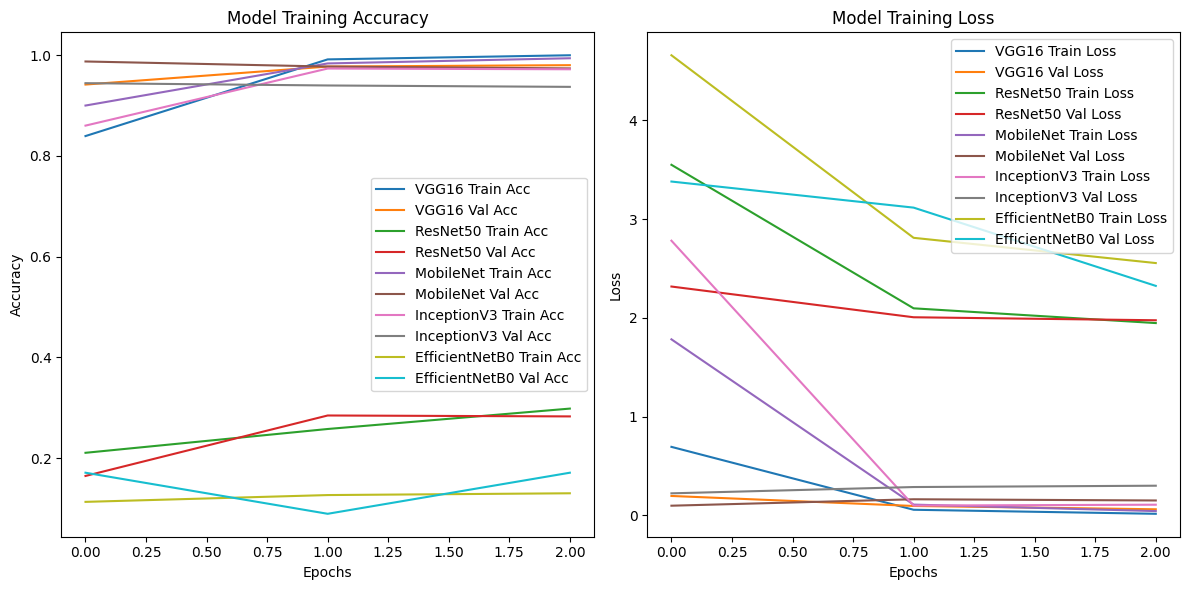

In [12]:
import pickle
import matplotlib.pyplot as plt

# List of model names and corresponding files
model_files = {
    "VGG16": r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F\training_history_vgg16.pkl",
    "ResNet50": r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F\training_history_resnet50.pkl",
    "MobileNet": r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F\training_history_mobilenet.pkl",
    "InceptionV3": r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F\training_history_inceptionv3.pkl",
    "EfficientNetB0": r"D:\GUVI PROJECTS\Multifish\images.cv_jzk6llhf18tm3k0kyttxz\CNN_F\training_history_efficientnetb0.pkl"
}

# Function to load history
def load_history(file):
    with open(file, 'rb') as f:
        return pickle.load(f)

# Plot training history
plt.figure(figsize=(12, 6))
for model, file in model_files.items():
    history = load_history(file)

    # Extract accuracy and loss
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    train_loss = history['loss']
    val_loss = history['val_loss']

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_acc, label=f"{model} Train Acc")
    plt.plot(val_acc, label=f"{model} Val Acc")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Model Training Accuracy")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label=f"{model} Train Loss")
    plt.plot(val_loss, label=f"{model} Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Model Training Loss")
    plt.legend()

# Show plots
plt.tight_layout()
plt.show()
